In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

# Análisis de frecuencia de eventos por hora, por día de la semana

En este notebook vamos a analizar la frecuencia que tienen ciertos eventos dependiendo del momento del día en el que se registren. 

En primer lugar consideraremos aquellos que estén relacionados a **cómo un usuario accede al sitio**, y por otro lado aquellos eventos referidos al **flujo de compra** de un producto.

Por lo tanto vamos a iniciar este análisis posando las siguientes preguntas:

1. ¿Se puede observar mayor actividad en ciertos días?

2. Además del día, ¿Existe una franja horaria en donde se registre una mayor cantidad de eventos? ¿Se mantiene el comportamiento entre los distintos eventos o varía dependiendo del tipo?

In [2]:
df = pd.read_csv('data/events.csv', low_memory=False)

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weekday'] = df['timestamp'].dt.weekday_name
df['hour'] = df['timestamp'].dt.hour

## Cantidad de eventos por hora y por día de la semana
Primero revisaremos el tráfico del sitio, sin separar por evento, para darnos una idea general de cómo está repartido la totalidad del tráfico según la franja horaria y día de la semana.

In [4]:
eventos_df = df.loc[:,['timestamp', 'weekday', 'hour', 'event']]
eventos_df['weekday'] = pd.Categorical(eventos_df['weekday'],\
               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [5]:
# Creamos una tabla pivot para poder mostrar los datos que nos interesan utilizando un Heatmap.
_heatmap = eventos_df.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')
_heatmap

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,6858,6578,5068,3226,2002,1393,558,268,448,932,...,9136,8963,9442,8873,9752,10518,10668,10380,10219,11035
Tuesday,11122,10618,8604,5380,3453,1874,873,684,748,1438,...,10137,10007,10322,9689,9598,9903,9295,9701,10166,10443
Wednesday,10422,9727,7747,5316,2529,1645,1068,527,791,1487,...,9738,9592,12221,10526,8823,8998,8350,8741,9247,11436
Thursday,10155,9680,7807,5599,2938,1593,1015,625,481,1232,...,8883,9475,9788,9762,9413,9240,9168,9371,9708,10475
Friday,10357,8485,7491,5387,2982,1400,1185,684,776,1151,...,9171,7942,9684,9279,8163,8155,7621,8593,8309,8596
Saturday,9211,7600,6535,4560,2580,1826,949,524,753,1118,...,7676,6369,6439,6459,6046,5681,5955,5768,5715,6637
Sunday,6253,6290,5284,3650,2354,1604,609,598,626,719,...,5470,6504,6741,5972,5819,5903,5321,6313,6048,7054


In [6]:
def crear_grafico_heatmap(heatmap, color, titulo):
    g = sns.heatmap(heatmap, cmap=color)
    g.set_title(titulo, fontsize=16)
    g.set_xlabel("Hora", fontsize=14)
    g.set_ylabel("Día", fontsize=14)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    return g

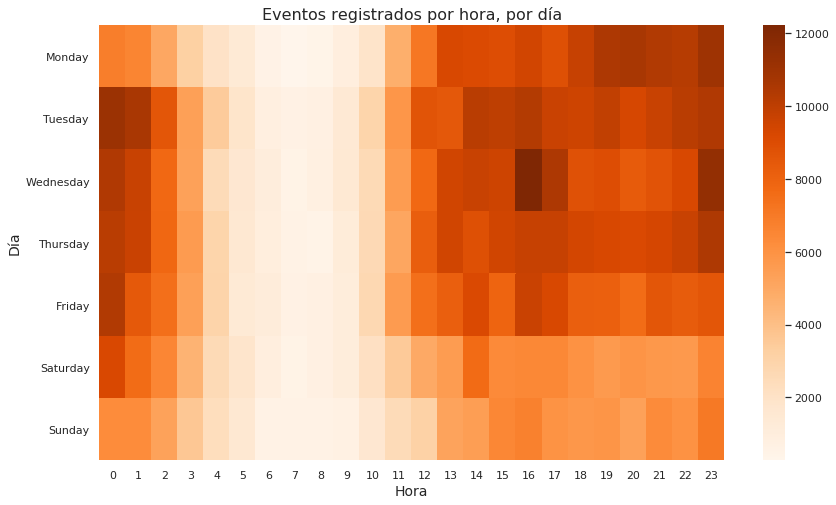

In [7]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Oranges', 'Eventos registrados por hora, por día')
plt.show()

## Filtrando según cómo accedió el usuario al sitio

Ahora vamos a filtrar los eventos en tres categorías, según cómo accedió el usuario al sitio.

## Visited Site (visita directa a través de un link)

In [8]:
visitas_directas = eventos_df.loc[eventos_df['event'] == 'visited site', :]
_heatmap = visitas_directas.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')

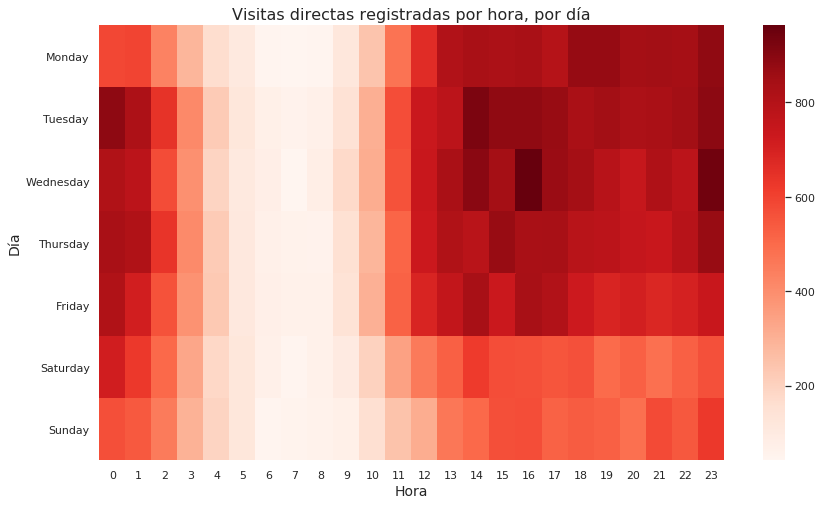

In [9]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Reds', 'Visitas directas registradas por hora, por día')
plt.show()

## Ad Campaign Hit (acceso mediante una publicidad)

In [10]:
visitas_publicidad = eventos_df.loc[eventos_df['event'] == 'ad campaign hit', :]
_heatmap = visitas_publicidad.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')

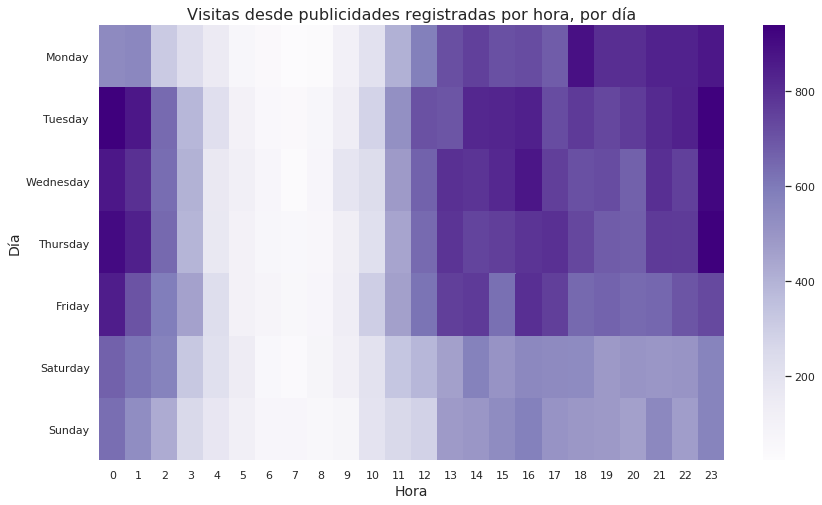

In [11]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Purples', 'Visitas desde publicidades registradas por hora, por día')
plt.show()

## Search Engine Hit (el usuario accede desde un buscador web)

In [12]:
visitas_buscadores = eventos_df.loc[eventos_df['event'] == 'search engine hit', :]
_heatmap = visitas_buscadores.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')

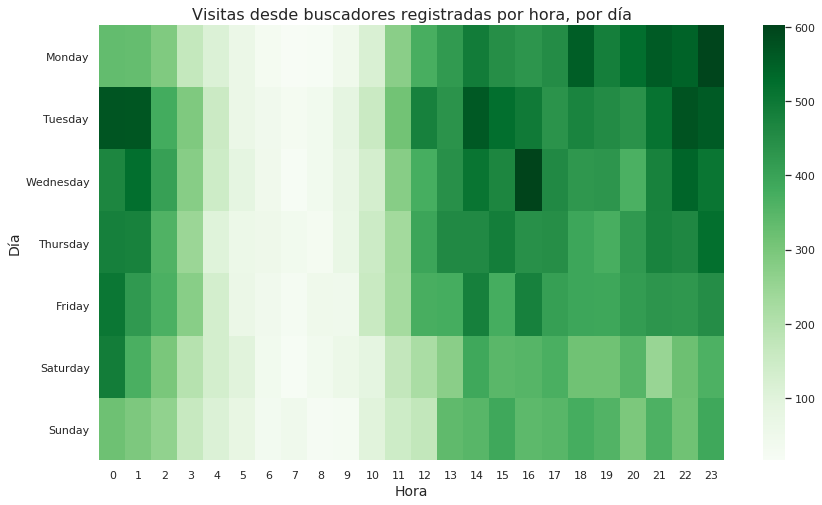

In [13]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Greens', 'Visitas desde buscadores registradas por hora, por día')
plt.show()

## Observaciones respecto al tráfico según tipo de acceso al sitio

Podemos notar claramente que el comportamiento de los usuarios respecto al acceso al sitio se mantiene independientemente del tipo de evento.

En primer lugar, vemos que hay mayor frecuencia de eventos durante los días de semana que durante los fines de semana.

Además se puede observar que en los tres casos expuestos, hay más accesos al sitio durante el horario laboral, presentando una pequeña disminución entre las 19 y 21 horas, para luego volver a incrementarse la frecuencia hasta las primeras horas de la madrugada. 

La franja horaria comprendida entre las 5 y las 9 de la mañana presenta actividad nula.

De todas formas por falta de datos demográficos sobre los usuarios del sitio, creo prudente no realizar afirmaciones respecto al motivo del comportamiento de los usuarios.

# Productos vistos, checkouts y compras

Procederemos a realizar heatmaps para estos eventos, ya que nos interesa saber si el comportamiento de los usuarios en estos eventos es similar al que observamos en las visitas al sitio.

In [14]:
checkouts = eventos_df.loc[eventos_df['event'] == 'checkout',['timestamp', 'weekday', 'hour', 'event']]
_heatmap = checkouts.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')

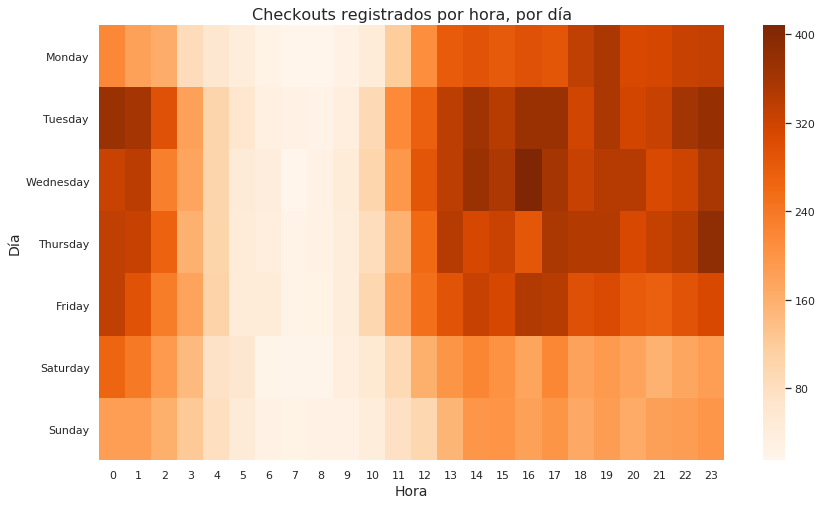

In [15]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Oranges', 'Checkouts registrados por hora, por día')
plt.show()

In [16]:
conversiones = eventos_df.loc[eventos_df['event'] == 'conversion',['timestamp', 'weekday', 'hour', 'event']]
_heatmap = conversiones.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')

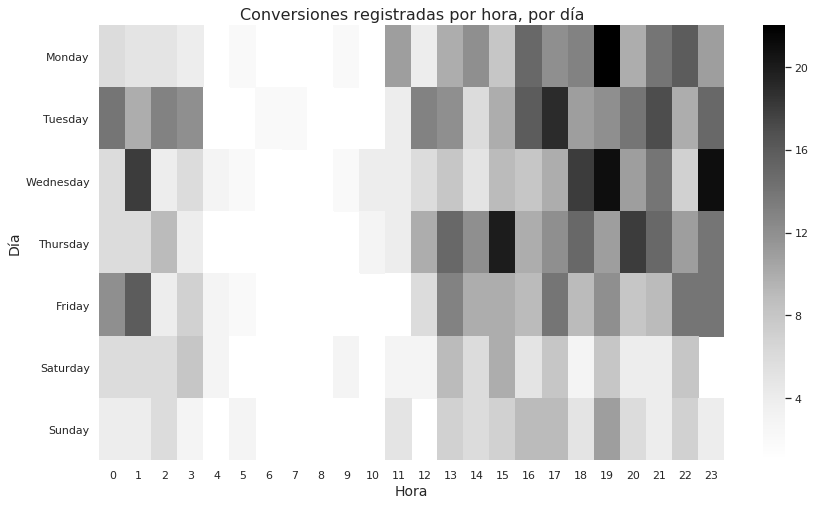

In [17]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Greys', 'Conversiones registradas por hora, por día')
plt.show()

In [18]:
productos_vistos = eventos_df.loc[eventos_df['event'] == 'viewed product', ['timestamp', 'weekday', 'hour', 'event']]
_heatmap = productos_vistos.pivot_table(index='weekday', columns='hour', values='event', aggfunc='count')

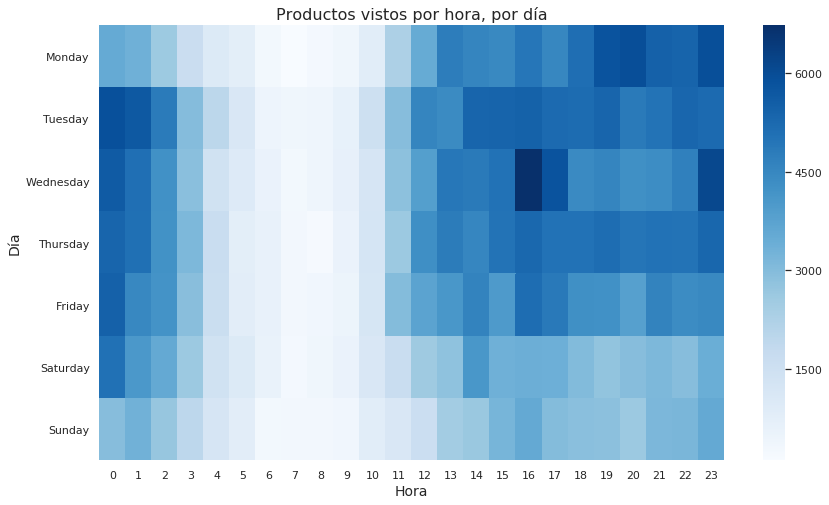

In [19]:
plt.figure(figsize=[14,8])
g = crear_grafico_heatmap(_heatmap, 'Blues', 'Productos vistos por hora, por día')
plt.show()